&nbsp; 2025 Created By Abdan Hafidz
# Import Utilities & Library

In [199]:
from abdanbst.bst import *

In [200]:
import inspect

def psource(*functions):
    "Print the source code for the given function(s)."
    code = '\n\n'.join(inspect.getsource(fn) for fn in functions)
    print(code)

# Tree

Sebuah pohon adalah graf terhubung yang tidak memiliki siklus dan terdiri dari 
𝑛 simpul serta  𝑛 - 1 Menghapus satu sisi dari pohon akan membagi graf menjadi dua komponen terpisah, sementara menambahkan satu sisi ke pohon akan membentuk sebuah siklus. Selain itu, selalu ada satu jalur unik yang menghubungkan setiap pasangan simpul dalam pohon.

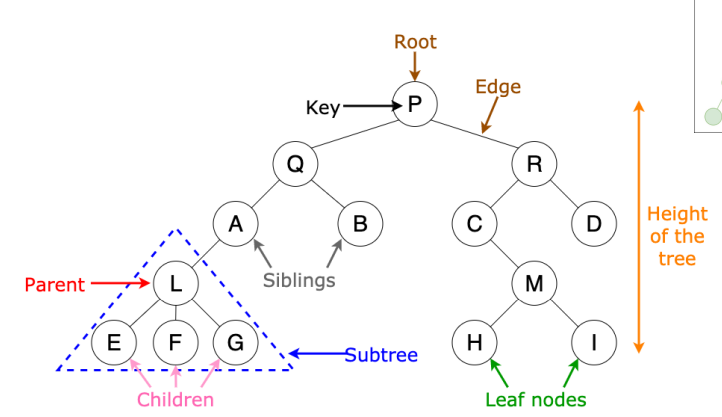

## Representasi Sebuah Tree

Sama seperti graf pada umumnya representasi tree umum yang digunakan adalah adjacency list

Dari gambar di atas kita bisa melihat bahwa P memiliki children yaitu Q dan R sehingga kita bisa membuat

Menggunakan dictionary di bawah ini!
```json
tree = P :{
    left : Q
    right : R
}
```

Kemudian ternyata Q dan R juga merupakan sebuah subtree dan masing - masing dari mereka adalah parent yang punya child, Q mempunyai children yaitu A dan B, sedangkan children dari R adalah C dan D

```json
tree = P :{
    left : Q : {
        left :A,
        right:B
    }
    right : R :{
        left:C,
        right:D
    }
}
```

dst ...

Pembangunan tree dilanjutkan untuk semua komponen

## Binary Search Tree

<p>🌳 Apa Itu Binary Search Tree? BST adalah struktur data berbentuk pohon biner di mana: <br>
✅ Setiap node punya maksimal 2 anak (left & right). <br>
✅ Nilai di subtree kiri selalu lebih kecil dari root.<br>
✅ Nilai di subtree kanan selalu lebih besar dari root.<br>
✅ Tidak ada duplikasi nilai dalam BST. </p>

📌 Uniknya, setiap pencarian nilai bisa dilakukan dengan efisiensi tinggi, karena kita cukup memilih untuk ke kiri (jika lebih kecil) atau ke kanan (jika lebih besar).



![](assets/20250318_232913_gif1.gif)


In [201]:
psource(new_bst)

def new_bst(key = 0):
    return {'key': key, 'left': None, 'right': None}



## Creating a BST

Langkah pertama kita instansiasi sebuah root dari BST yang ingin kita buat, sebagai contoh misalkan kita mempunyai tree dengan root asal adalah ``3``

In [202]:
myBST = new_bst(3)

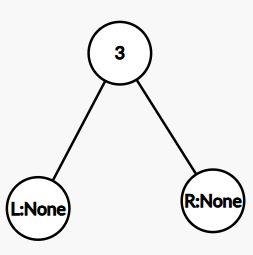
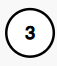

kemudian kita dapat menambahkan children dari 3 misalkan adalah 1 dan 2, menggunakan fungsi `insert` 

In [203]:
psource(insert)

def insert(tree, key):
    if tree is None:
        return {'key': key, 'left': None, 'right': None}
    if key < tree['key']:
        tree['left'] = insert(tree['left'], key)
    else:
        tree['right'] = insert(tree['right'], key)
    return tree



Fungsi `insert(tree, key)` menambahkan elemen baru ke dalam Binary Search Tree (BST) dengan aturan bahwa nilai lebih kecil dari node saat ini akan dimasukkan ke subtree kiri, sedangkan nilai lebih besar atau sama dimasukkan ke subtree kanan. Jika pohon masih kosong (None), fungsi membuat node baru dengan key sebagai nilai utama dan left serta right sebagai None. Proses ini berjalan secara rekursif, memastikan setiap elemen ditempatkan pada posisi yang sesuai dalam BST. Setelah penyisipan selesai, fungsi mengembalikan BST yang telah diperbarui.

In [204]:
insert(myBST, 1)
insert(myBST, 2)

{'key': 3,
 'left': {'key': 1,
  'left': None,
  'right': {'key': 2, 'left': None, 'right': None}},
 'right': None}

Perhatikan bahwa karena nilai 1 < 3 maka 1 akan ditempatkan di sebelah kiri 3, kemudian 2 akan berada di sebelah kanan 1

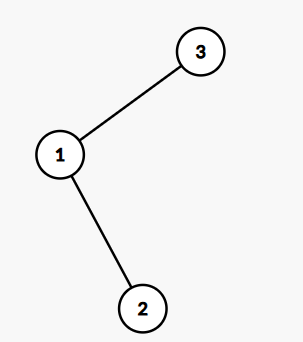
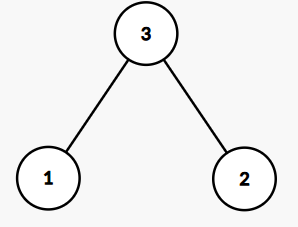
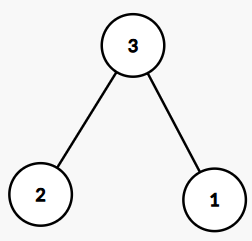

Misal kita tambahkan lagi children yaitu 4 dan 5

In [205]:
insert(myBST, 4)
insert(myBST, 5)

{'key': 3,
 'left': {'key': 1,
  'left': None,
  'right': {'key': 2, 'left': None, 'right': None}},
 'right': {'key': 4,
  'left': None,
  'right': {'key': 5, 'left': None, 'right': None}}}

Perhatikan bahwa karena 4 dan 5 > 3 maka 4 dan 5 harus ditempatkan di segmen kanan children 3, 4 berada di sebelah kanan 3 dan 5 berada di sebelah kanan 4.

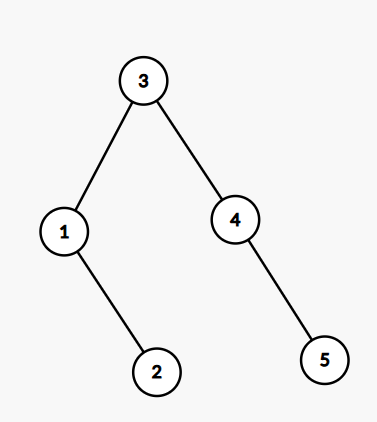
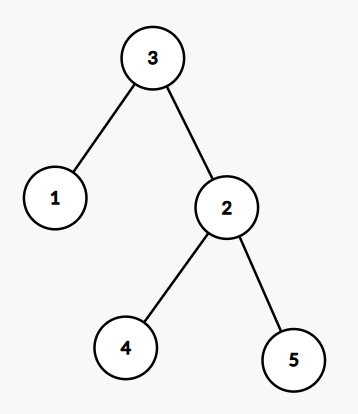

Sekarang jika kita tambahkan 0, 
- 0 < 3 , maka 0 ditempatkan di sisi kirinya 3
- 0 < 1 , maka 0 ditempatkan di sisi kirinya 1

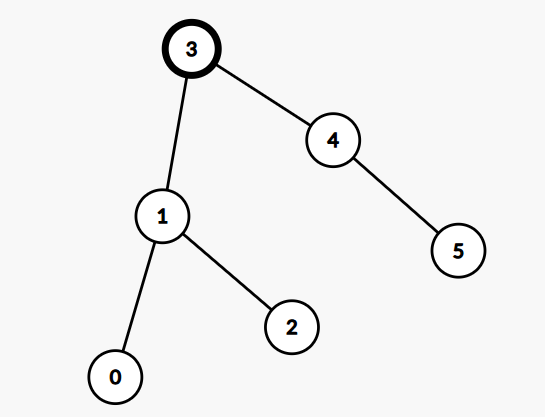

In [206]:
insert(myBST, 0)

{'key': 3,
 'left': {'key': 1,
  'left': {'key': 0, 'left': None, 'right': None},
  'right': {'key': 2, 'left': None, 'right': None}},
 'right': {'key': 4,
  'left': None,
  'right': {'key': 5, 'left': None, 'right': None}}}


```python
    if key < tree['key']:
        tree['left'] = insert(tree['left'], key)
    else:
        tree['right'] = insert(tree['right'], key)
```

## Searching Node

In [207]:
psource(search)

def search(tree, key):
    if tree is None or tree['key'] == key:
        return tree is not None
    if key < tree['key']:
        return search(tree['left'], key)
    return search(tree['right'], key)



Fungsi `search(tree, key)` digunakan untuk mencari apakah suatu nilai (`key`) terdapat dalam **Binary Search Tree (BST)** . Fungsi ini bekerja secara **rekursif** , dimulai dari akar (`tree`). Jika pohon kosong (`None`), maka nilai tidak ditemukan dan fungsi mengembalikan `False`. Jika node saat ini memiliki nilai yang sama dengan `key`, maka fungsi mengembalikan `True`, menandakan bahwa nilai telah ditemukan. Jika `key` lebih kecil dari node saat ini, pencarian dilanjutkan ke **subtree kiri** , sedangkan jika lebih besar, pencarian berlanjut ke **subtree kanan** . Proses ini terus berjalan hingga menemukan nilai yang dicari atau mencapai **node kosong (`None`)** , yang berarti nilai tidak ada dalam BST. Kompleksitas waktu pencarian dalam BST adalah **O(log n) dalam kasus terbaik** jika BST seimbang, tetapi dapat menjadi **O(n) dalam kasus terburuk** jika BST berbentuk seperti **linked list** (tidak seimbang). Dengan metode ini, pencarian dalam BST menjadi efisien karena setiap langkah mempersempit ruang pencarian hingga setengahnya. 🚀


In [208]:
search(myBST, 6)

False

In [209]:
search(myBST, 1)

True

## Delete Node

In [210]:
psource(delete)

def delete(tree, key):
    if tree is None:
        return tree
    if key < tree['key']:
        tree['left'] = delete(tree['left'], key)
    elif key > tree['key']:
        tree['right'] = delete(tree['right'], key)
    else:
        if tree['left'] is None:
            return tree['right']
        elif tree['right'] is None:
            return tree['left']
        min_larger_node = tree['right']
        while min_larger_node['left'] is not None:
            min_larger_node = min_larger_node['left']
        tree['key'] = min_larger_node['key']
        tree['right'] = delete(tree['right'], min_larger_node['key'])
    return tree



Fungsi `delete(tree, key)` digunakan untuk menghapus **node tertentu** dalam **Binary Search Tree (BST)** . Fungsi ini bekerja secara **rekursif** , mencari node dengan nilai `key` yang ingin dihapus, lalu menangani berbagai kemungkinan kondisi penghapusan.

Pertama, jika **pohon kosong (`None`)** , maka fungsi langsung mengembalikan `None`, karena tidak ada yang perlu dihapus. Jika `key` yang dicari **lebih kecil dari node saat ini** , pencarian dilanjutkan ke **subtree kiri** . Jika `key` lebih besar, pencarian berpindah ke **subtree kanan** . Namun, jika ditemukan node dengan `key` yang sama, ada tiga kemungkinan kasus:

1. **Node tidak memiliki anak** (leaf node): Node dapat dihapus langsung dengan mengembalikan`None`.
2. **Node memiliki satu anak** (baik hanya subtree kiri atau hanya subtree kanan): Node dihapus, dan anaknya menggantikan posisi node tersebut.
3. **Node memiliki dua anak** : Dalam kasus ini, kita mencari**node terkecil di subtree kanan** (successor), menggantikan nilai node yang dihapus dengan nilai successor, lalu menghapus successor dari subtree kanan.

Proses pencarian **successor** dilakukan dengan mengambil node paling kiri di subtree kanan. Setelah menemukan successor, kita mengganti nilai node yang dihapus dengan nilai successor dan kemudian menghapus successor dari subtree kanan.

Dengan pendekatan ini, **struktur BST tetap terjaga** , dan penghapusan dilakukan secara efisien dengan kompleksitas waktu **O(log n) dalam BST seimbang** , tetapi bisa mencapai **O(n) jika BST tidak seimbang** . 🚀


In [211]:
delete(myBST, 1)

{'key': 3,
 'left': {'key': 2,
  'left': {'key': 0, 'left': None, 'right': None},
  'right': None},
 'right': {'key': 4,
  'left': None,
  'right': {'key': 5, 'left': None, 'right': None}}}

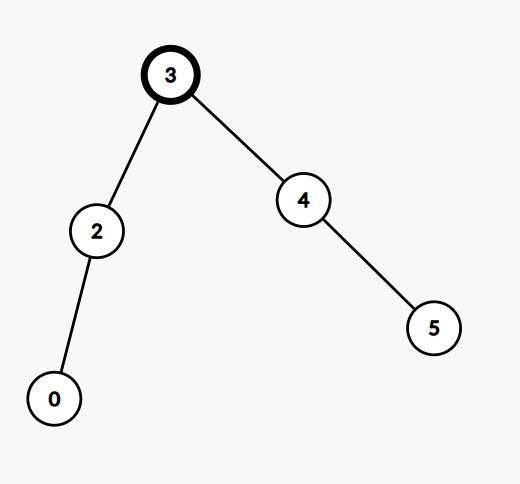

## From Array to Optimal BST

Misalkan kita mempunyai sebuah data acak [1,5,3,4,9,1,11], kita akan coba mengonstruksi BSTnya

Pertama - tama, agar optimal maka datanya akan kita urutkan

In [212]:
arr = [1,5,3,4,9,1,11]

In [213]:
arr.sort()

In [214]:
arr

[1, 1, 3, 4, 5, 9, 11]

Kemudian tetapkan bahwa root dari BST adalah nilai tengah segmen data yang kita miliki

In [215]:
left = 0
right = len(arr) - 1
mid = (left+right)//2

In [216]:
arr[mid]

4

In [217]:
myBST2 = new_bst(arr.pop(mid))

In [218]:
myBST2

{'key': 4, 'left': None, 'right': None}

In [219]:
arr

[1, 1, 3, 5, 9, 11]

Sekarang masukkan semua elemen ke dalam BST

In [220]:
for node in arr:
    insert(myBST2, node)

In [221]:
myBST2

{'key': 4,
 'left': {'key': 1,
  'left': None,
  'right': {'key': 1,
   'left': None,
   'right': {'key': 3, 'left': None, 'right': None}}},
 'right': {'key': 5,
  'left': None,
  'right': {'key': 9,
   'left': None,
   'right': {'key': 11, 'left': None, 'right': None}}}}

## Tree Traversal

In [222]:
myBST3 = new_bst("F")
insert(myBST3, "B")
insert(myBST3, "G")
insert(myBST3, "A")
insert(myBST3, "D")
insert(myBST3, "I")
insert(myBST3, "C")
insert(myBST3, "E")
insert(myBST3, "H")

{'key': 'F',
 'left': {'key': 'B',
  'left': {'key': 'A', 'left': None, 'right': None},
  'right': {'key': 'D',
   'left': {'key': 'C', 'left': None, 'right': None},
   'right': {'key': 'E', 'left': None, 'right': None}}},
 'right': {'key': 'G',
  'left': None,
  'right': {'key': 'I',
   'left': {'key': 'H', 'left': None, 'right': None},
   'right': None}}}

### Pre Order Traversal

Pre Order Traversal sama dengan Depth First Search

```pascal
mark_node();
visit_left();
visit_right()
```

In [223]:
psource(preorder_traversal)

def preorder_traversal(tree):
    if tree is None:
        return []
    return [tree['key']] + preorder_traversal(tree['left']) + preorder_traversal(tree['right'])



![](assets/20250319_002749_Preorder-traversal.gif)





In [224]:
preorder_traversal(myBST3)

['F', 'B', 'A', 'D', 'C', 'E', 'G', 'I', 'H']

### In Order Traversal

Melakukan traversal secara triangular : 
```pascal
visit_left();
mark_node();
visit_right();
```

In [225]:
psource(inorder_traversal)

def inorder_traversal(tree):
    if tree is None:
        return []
    return inorder_traversal(tree['left']) + [tree['key']] + inorder_traversal(tree['right'])




![](assets/20250319_002749_Inorder-traversal.gif)

In [226]:
inorder_traversal(myBST3)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

### Post Order Traversal

Post order traversal melakukan penelusuran secara zigzag :
```pascal
visit_left();
visit_right();
mark_node();
```

In [227]:
psource(postorder_traversal)

def postorder_traversal(tree):
    if tree is None:
        return []
    return postorder_traversal(tree['left']) + postorder_traversal(tree['right']) + [tree['key']]




![](assets/20250319_002804_Postorder-traversal.gif)

In [228]:
postorder_traversal(myBST3)

['A', 'C', 'E', 'D', 'B', 'H', 'I', 'G', 'F']